In [126]:
#Aarian Dhanani
#Due February 17th, 2022
#Analyzing Amazon Data
import numpy as np
import csv, matplotlib.pyplot as plt
import os
os.system('clear')

#Opening the file
file = open('amazonOrderList.csv')
amazonList = csv.reader(file)

#Creating the intital list
listData = []
header = next(amazonList)
for row in amazonList:
    listData.append(row)

#Creating the Numpy Array
amazonInfo = np.array(listData)

Total Amount Spent:

In [127]:
#Finding the total amount spend
amazonInfo = np.char.strip(amazonInfo, chars = '$')
itemPrices = amazonInfo[ :,12].astype(float)
total = np.sum(itemPrices)
print("Total Amount Spent: $" + str(total))

Total Amount Spent: $27766.9


Most and least expensive orders and average and median order totals

In [128]:
#Most expensive item data
mostExpensive = np.amax(itemPrices[np.nonzero(itemPrices)])
print("Most expensive item price: $" + str(mostExpensive))

mostExpensiveItem = amazonInfo[np.argmax(itemPrices[np.nonzero(itemPrices)]) + 1, 2]
print("Most expensive item: " + str(mostExpensiveItem))

#Least expensive item data
leastExpensive = np.amin(itemPrices[np.nonzero(itemPrices)])
print("Least expensive item price: $" + str(leastExpensive))

leastExpensiveItem = amazonInfo[np.argmin(itemPrices[np.nonzero(itemPrices)]) + 1, 2]
print("Least expensive item: " + str(leastExpensiveItem))

#Average price of the items
average = np.mean(itemPrices)
print("Average Price: $" + str(average))

#Median price of the items
medianValue = np.median(itemPrices)
print("Median Price: $" + str(medianValue))

Most expensive item price: $1985.0
Most expensive item: Professional Bike Assembly and Basic Fit
Least expensive item price: $1.22
Least expensive item: Allstate 3-Year PC Peripheral Protection Plan ($0-49.99)
Average Price: $39.32988668555241
Median Price: $18.97


Taxes:

In [129]:
#Finding the total taxes using the tax column
itemPrices = amazonInfo[ :,28].astype(float)
totalTax = np.sum(itemPrices)
print("Total tax: $" + str(totalTax))

#Finding effective sales tax rate on Amazon
effectiveSalesTaxRate = (totalTax/total) * 100
print("Effective sales tax rate: " + str(effectiveSalesTaxRate) + "%")

Total tax: $2042.48
Effective sales tax rate: 7.355808534622158%


Graph

<BarContainer object of 6 artists>

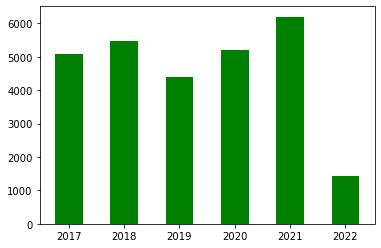

In [130]:
#This is for creating the graph

#The counter will help me get the index of the price
counter = 0

#Setting up the algorithm
barAxes = ["2017", "2018", "2019", "2020", "2021", "2022"]
barValues = [0.0,0.0,0.0,0.0,0.0,0.0]
spending = amazonInfo[ :,12].astype(float)
date = amazonInfo[ :,0].astype(str)

# For testing purposes
# testValue = "Hello"
# if(testValue.endswith("o") == 1):
#     print("Working")

#For loop with possible outcomes in an if statement
for dateValue in date:
    if(dateValue.endswith("17") == 1):
        barValues[0] = float(barValues[0]) + float(spending[counter])
    if(dateValue.endswith("18") == 1):
        barValues[1] = float(barValues[1]) + float(spending[counter])
    if(dateValue.endswith("19") == 1):
        barValues[2] = float(barValues[2]) + float(spending[counter])
    if(dateValue.endswith("20") == 1):
        barValues[3] = float(barValues[3]) + float(spending[counter])
    if(dateValue.endswith("21") == 1):
        barValues[4] = float(barValues[4]) + float(spending[counter])
    if(dateValue.endswith("22") == 1):
        barValues[5] = float(barValues[5]) + float(spending[counter])
    counter = counter + 1

#Plot the graph
plt.bar(barAxes,barValues, color = "green", width = 0.5)